TODO 打开.h5文件

In [1]:
import h5py
import numpy as np
import nibabel as nib
import glob as glob
import os
from tqdmtqdm import tqdm
import SimpleITK as sitk
import nrrd
import torch
# import nibabel as nib
import monai.transforms as transforms
import monai

KeyboardInterrupt: 

In [88]:
import monai.transforms as transforms

# Load Nifti image
nifti_img = nib.load(r"G:\asim\BRATS\input_28\pred\FLARE23_0001.h5")
image = nifti_img.get_fdata()

# Convert image to PyTorch tensor
image = torch.Tensor(image)

# Create MONAI transforms
cropper = transforms.CropForegroundd(keys=["image"], source_key='image',meta_keys=["end_coord"])

# Create data dictionary
data_dict = {
    "image": image
}

# Apply transform to data
data_dict = cropper(data_dict)

# Get end coordinate
# end_coord = data_dict["end_coord"]
end_coord = data_dict['extra_info'] ['box_start']
print("End Coordinate: ", end_coord)

KeyError: 'extra_info'

In [21]:
h5f = h5py.File(r'G:\asim\BRATS\input_28\pred\FLARE23_0001.h5', 'r')
image = h5f['data'][:]
label = h5f['label'][:]
image=np.array(image,dtype='float32')
image=np.flip(image,axis=0)
label=np.flip(label,axis=0)

# image=image.swapaxes(0, 2)
# label=label.swapaxes(0, 2)
# 创建NIfTI文件
nifti_image = nib.Nifti1Image(image, np.eye(4))

# 保存NIfTI文件
nib.save(nifti_image, r'G:\asim\BRATS\input_28\pred\FLARE23_00012.nii')
# 创建NIfTI文件
nifti_label = nib.Nifti1Image(label, np.eye(4))

# 保存NIfTI文件
nib.save(nifti_label, r'G:\asim\BRATS\input_28\pred\FLARE23_00012_label.nii')

TODO 生成.h5文件

In [32]:
# 设置输入和输出目录
input_dir = r'D:\Work\Datasets\Normaldatas89\\'
output_dir = r'D:\Work\Datasets\Normaldatas89\h5file\\'
image_list= sorted(glob.glob(os.path.join(input_dir,"dataimage" +'*nii.gz')))
print(image_list)
# label_list=sorted(glob.glob(os.path.join(input_dir,"fusion_label" +'*nii.gz')))
# 遍历所有nii文件
for image in tqdm(image_list,total=len(image_list)):
    img=image
    lab=img.replace('dataimage','fusion_label')
    name=img.split('dataimage')[0]
    print(name)
    # 加载nii文件
    img_arr = nib.load(img)
    lab_arr=nib.load(lab)
    # 获取图像数据和头信息
    data = img.get_fdata()
    header = img.header

    # 构建输出文件名
    output_filename = name + '.h5'
    output_path = os.path.join(output_dir, output_filename)

    # 将数据保存到.h5文件中
    with h5py.File(output_path, 'w') as f:
        f.create_dataset('data', data=data)
        for key in header:
            f.attrs[key] = header[key]

[]


In [59]:
# 指定 nii.gz 文件路径
input_dir = r'H:\Datasets\MRA\MRA109\train\\'
output_dir = r'H:\Datasets\MRA\MRA109\MIDAS_nrrd\\'
image_list= sorted(glob.glob(os.path.join(input_dir,"data\\" +'*nii.gz')))
print("x")

# print(image_list)
# label_list=sorted(glob.glob(os.path.join(input_dir,"fusion_label" +'*nii.gz')))
# 遍历所有nii文件
# for image in tqdm(image_list,total=len(image_list)):
#     img=image
#     lab=img.replace('data\\','label\\')
#     name=img.split('data\\')[-1].replace('.nii.gz','')
#     print(name)
#     # 使用 SimpleITK 库的 ReadImage 加载 nii.gz 文件
#     image = sitk.ReadImage(image)
#     label=sitk.ReadImage(lab)
#
#     print(image.GetPixelIDTypeAsString()) # 输出图像的像素类型
#     print(image.GetDimension()) # 输出图像的维度
#     # 指定要保存的 nrrd 文件路径
#     imgpath = r'H:\Datasets\MRA\MRA109\MIDAS_nrrd\data\\'+name+'.nrrd'
#     # 使用 SimpleITK 库的 WriteImage 将图像另存为 nrrd 格式文件
#     sitk.WriteImage(image, imgpath)
#
#     labelpath = r'H:\Datasets\MRA\MRA109\MIDAS_nrrd\label\\'+name+'.nrrd'
#     # 使用 SimpleITK 库的 WriteImage 将图像另存为 nrrd 格式文件
#     sitk.WriteImage(label, labelpath)

x


In [58]:
label = nrrd.read(r'H:\Datasets\MRA\MRA109\MIDAS_nrrd\data\Normal002-MRA_brain.nrrd')
print("label",label.shape)
label_data = (label[0] / 255).astype(np.float32)

NameError: name 'nrrd' is not defined

TODO 生成csv文件

In [42]:
import pandas as pd
import glob
import os
import numpy as np
import openpyxl
from tqdm import tqdm


In [41]:
model="write"
# model="read"
csvname=r'E:\hgtdata\data_new\train_data\dwi\train_val.csv'
Exsit_training_path = r'E:\hgtdata\data_new\train_data\dwi\\'

datanameList = sorted(glob.glob(os.path.join(Exsit_training_path, '*.nii.gz')))
# labelnameList = sorted(glob.glob(os.path.join(Exsit_training_path, 'val*seg.npy')))
datanameList.sort()
# labelnameList.sort()

# percentlist=[]
filenamelist=[]
# classificationlist=[]
# numberlist=[]

if model=="write":
    for i in range(0,len(datanameList),1):
# for i in tqdm(range(len(datanameList))):
#     num=datanameList[i].split('seg.npy')[0].split('__')[1]

        filename=str(datanameList[i]).split('dwi\\')[-1]

    # pathnamelist.append(pathname)
        filenamelist.append(filename)

        output_excel = { 'filename': []}

    # output_excel['pathname'] = pathnamelist
        output_excel['filename'] = filenamelist

        output = pd.DataFrame(output_excel)
        output.to_csv(csvname, index=False)
        print('\r[ %d / %d]' % (i, len(datanameList)), end='')

[ 220 / 221]

'''计算像素标签值'''

In [ ]:
#计算标签像素之和
Exsit_training_path = r'C:\Users\hello\Desktop\Comparative_Test\vessel_testing\\'

datanameList = sorted(glob.glob(os.path.join(Exsit_training_path, '*seg.nii.gz')))

for data in tqdm(datanameList,total=len(datanameList)) :

    # imagname=data.split('label\\')[-1]
    imag_sum=nib.load(data).get_fdata().sum()
    print(imag_sum)
    # fp = open(r'E:\hgtdata\data_new\test_data\testabel_sum.txt', "a+")
#     print('\n file name is ,', imagname, file=fp)
#     print('\n file sum is ,', imag_sum, file=fp)
# fp.close()

TODO nnUnet 中的dataset.json 文件生成

In [16]:
import os
import json

In [19]:
def create_dataset_json(data_root: str, task_name: str):
    dataset_dict = {
        "name": task_name,
        "description": "",
        "tensorImageSize": "3D",
        "reference": "",
        "licence": "",
        "release": "",
        "modality": {
            "0": "MRI"
        },
        "labels": {
            "0": "background",
            "1": "vessel",
         },
        "numTraining": len(os.listdir(os.path.join(data_root, "imagesTr"))),
        "numTest": len(os.listdir(os.path.join(data_root, "imagesTs"))),
        "training": [
            {
                "image": "./imagesTr/{}".format(image_name),
                "label": "./labelsTr/{}".format(image_name)
            }
            for image_name in os.listdir(os.path.join(data_root, "imagesTr"))
        ],
        "test": [
            "./imagesTs/{}".format(image_name)
            for image_name in os.listdir(os.path.join(data_root, "imagesTs"))
        ]
    }

    with open(os.path.join(data_root, "dataset.json"), "w") as fp:
        json.dump(dataset_dict, fp)
create_dataset_json(r"E:\Datasets_public\IXI_MRA45\\", "MRA")

In [ ]:
def get_ROI_area(target):
    assert len(target.shape) == 3
    z_min = 0
    y_min = 0
    x_min = 0
    z_max = 0
    y_max = 0
    x_max = 0
    # # c_max=[]
    # # for a in range(target.shape[0]):
    # #     for b in range (target.shape[1]):
    # #         for c in range (target.shape[2]):
    # #             if target[a][b][c]!=0:
    # #                 z_min.append(c)
    # #                 break
    # # z_min=[sorted(z_min)[0]]
    #
    # for a in range(target.shape[0]):
    #     for b in range (target.shape[2]):
    #         for c in range (target.shape[1]):
    #             if target[a][c][b]!=0:
    #                 y_min.append(c)
    #                 break
    # y_min=[sorted(y_min)[0]]
    #
    # for a in range(target.shape[1]):
    #     for b in range (target.shape[2]):
    #         for c in range (target.shape[0]):
    #             if target[c][a][b]!=0:
    #                 x_min.append(c)
    #                 break
    # x_min=[sorted(x_min)[0]]
        # TODO Y
    for x in range(target.shape[0]):
        if target[x, :, :].sum() != 0:
            x_min = x
            # print("a_min is :", x)
            break
    for x in range(target.shape[0]-1, x_min, 1):
        if target[x, :, :].sum() == 0:
            x_max = x
            # print("a_min is :", x)
            break
        #TODO Y
    for y in range(target.shape[1]):
        if target[:, y, :].sum() != 0:
            y_min = y
            break

    for y in range(target.shape[1]-1, y_min, -1):
        if target[:, y, :].sum() == 0:
            y_max = y
            # print("a_min is :", x)
            break
        # TODO Y
    for z in range(target.shape[2]):
        if target[:, :, z].sum() != 0:
            z_min = z
            # print("a_min is :", x)
            break
    for z in range(target.shape[2]-1,z_min , 1):
        if target[:, :, z].sum() == 0:
            z_max = z
            # print("a_min is :", x)
            break
    return x_min,x_max,y_min,y_max,z_min,z_max

TODO nii.gz文件重命名

In [70]:
###
input_dir = r'C:\Users\hello\Desktop\SSL\\'
output_dir = r'C:\Users\hello\Desktop\SSL\new\\'
label_list= sorted(glob.glob(os.path.join(input_dir,'image_*.nii.gz')))
for label in tqdm(label_list,total=len(label_list)):
    label_name=label.replace("image","new_image")

    label=nib.load(label)
    arr=label.get_fdata()
    arr[arr<2.5]=0
    affine=label.affine
    nifti_data = nib.Nifti1Image(arr, affine)
    nib.save(nifti_data,label_name)

100%|██████████| 4/4 [00:06<00:00,  1.66s/it]


In [10]:
import numpy
import csv
import torch
import numpy as np
import nibabel as nib
import SimpleITK as sitk
import pandas as pd
import glob

import sys

import os
import cv2


In [9]:
ori_path=r'E:\Datasets_public\IXI_MRA45\aug\CF_train_label\\'
# savepath=r'D:\SEED\test\resize_1024\\'

#TODO 重命名
image_list = sorted(glob.glob(os.path.join(ori_path,  '*.nii.gz')))
for i in range(0,1,1):
    datapath=image_list[i]
    arr=nib.load(datapath).get_fdata()
#     arr_shape=arr.size()
    print(arr)
    print('\r[ %d / %d]' % (i, len(image_list)), end='')


KeyboardInterrupt: 

TODO 截取三维图像中某区域范围

In [ ]:
data_path=r'E:\Datasets_public\IXI_MRA45\data\IXI473-IOP-1137-MRA.nii.gz'
label_path=r'E:\Datasets_public\IXI_MRA45\label\IXI473-IOP-1137-MRA_GT.nii.gz'

# datapath=label_path
data=nib.load(data_path)
data_arr=data.get_fdata()
newdata_arr=data_arr[:,250:1024,:]
newdata_arr=np.array(newdata_arr,dtype='int16')

# labelpath=label_path
label=nib.load(label_path)
label_arr=label.get_fdata()
newdlabel_arr=label_arr[:,250:1024,:]
newdlabel_arr=np.array(newdlabel_arr,dtype='uint8')

#save
nifti_data = nib.Nifti1Image(newdata_arr, data.affine)
nib.save(nifti_data, r'E:\Datasets_public\IXI_MRA45\IXI473-IOP-1137-MRA.nii.gz')

nifti_label = nib.Nifti1Image(newdlabel_arr, label.affine)
nib.save(nifti_label, r'E:\Datasets_public\IXI_MRA45\IXI473-IOP-1137-MRA_GT.nii.gz')
print("finish！")

TODO  npy2nii

In [17]:
import nibabel as nib
import numpy as np
import os
import glob


In [26]:
datafilePath=r'C:\Users\hello\Desktop\ixi\test\\'
# labelfilePath=r'D:\Work\ZoomNet\MedicalZooPytorch-master\datasets\vessel\generated1%\test_vol_16x16x16\\'
dataoutput=r'C:\Users\hello\Desktop\ixi\test\\'
labeloutput=r'C:\Users\hello\Desktop\ixi\test\\'
datanameList = sorted(glob.glob(os.path.join(datafilePath, 'image\\'+'*.npy')))
labelnameList = sorted(glob.glob(os.path.join(datafilePath,'mask\\'+'*.npy')))

for j in range(1):
    label_arr=np.load(r'C:\Users\hello\Desktop\ixi\test\mask\mask_120.npy')
    label_arr=np.argmax(label_arr,axis=3)
    # print(label_arr.shape)
    label_arr=np.array(label_arr,dtype='uint8')
    print('label_arr:',label_arr.shape)
    new_label = nib.Nifti1Image(label_arr, np.eye(4))
    # nib.save(new_label, 'nifti.nii.gz')
# new_image.set_data_dtype(np.my_dtype)
    labelname=str(labelnameList[j]).split('mask\\')[-1].replace('.npy','')
    print(labelname)
    print(labelnameList[j],j)#############split('_0')[-1]表示‘-0’前面的保留，[1]后面的保留
    nib.save(new_label, os.path.join(labeloutput,labelname+'_label.nii.gz'))
print("transform is over!")#####

label_arr: (128, 128, 128)
mask_120
C:\Users\hello\Desktop\ixi\test\\mask\mask_120.npy 0
transform is over!


In [25]:
label_arr1=nib.load(r'C:\Users\hello\Desktop\SSL\mida_pseudo\tabel2_8\target1\Normal001-MRA_brain.nii.gz')
affine=label_arr1.affine
label_arr=nib.load(r'C:\Users\hello\Desktop\SSL\mida_pseudo\tabel2_8\urpc\Normal081-MRA_brain_pred.nii.gz').get_fdata()
new_arr=label_arr.swapaxes(0, 2)
# label_arr[label_arr>0]=1
new_label = nib.Nifti1Image(new_arr, affine)
nib.save(new_label,r'C:\Users\hello\Desktop\SSL\mida_pseudo\tabel2_8\Normal081-MRA_brain_pred.nii.gz')

TODO 分割指标计算

In [6]:
from medpy import metric
import numpy as np
import nibabel as nib
import SimpleITK as sitk
import pandas as pd
import glob
import sys
import os
import time
import torch
from sklearn.metrics import accuracy_score

In [10]:
def calculate_metric_percase(pred, gt):

    dice = metric.binary.dc(pred, gt)
    jc = metric.binary.jc(pred, gt)
    hd95 = metric.binary.hd95(pred, gt)
    # acc=metric.binary.
    # hd=0
    # asd=0
    asd = metric.binary.asd(pred, gt)
    precision=metric.binary.precision(pred,gt)
    recall=metric.binary.recall(pred,gt)
    spe=metric.binary.specificity(pred,gt)
    sensti=metric.binary.sensitivity(pred,gt)
    # miou=metric.
    return dice,jc ,hd95,asd,precision,recall,spe,sensti

''' 二分类计算'''

In [20]:
pred_path=r'C:\Users\hello\Desktop\ixi\test\label.nii.gz'
gt_path=r'C:\Users\hello\Desktop\ixi\test\mask\mask_120.nii.gz'
pred=nib.load(pred_path).get_fdata()
gt=nib.load(gt_path).get_fdata()
start_time=time.time()
dice,jc ,hd95,asd,precision,recall,spe,sensti=calculate_metric_percase(pred, gt)
iou=dice/(2-dice)
pred_flatt=pred.ravel()
gt_flatt=gt.ravel()
acc=accuracy_score(gt_flatt,pred_flatt)

end_time=time.time()
Evaluate_time = end_time - start_time
print("Evaluate_time took {:.2f} seconds".format(Evaluate_time))
print("dice,iou,acc ,hd95,jc,asd,precision,recall,spe,sensti:",dice,iou,acc ,hd95,jc,asd,precision,recall,spe,sensti)

FileNotFoundError: No such file or no access: 'C:\Users\hello\Desktop\ixi\test\label.nii.gz'

In [3]:
def expand_as_one_hot_mul(input,C):
    '''
    多标签onehot编码
    '''
    # shape = list(C,input.size()[0],)
    C=C
    H=input.shape[0]
    W=input.shape[1]
    D=input.shape[2]

    data=input
    data_onehot = np.zeros((C, H, W, D))
    for i in range(C):
        data_onehot[i][data[:,:,:] == i] = 1
        '''
        当value为i时，则在对应位置的第i通道上赋1
        '''
    # print(data_onehot.sum())
    return data_onehot

'''
多分类计算
借助二分类计算库，先对pred和gt进行onehot编码，然后按通道分别计算
'''

In [19]:
pred_path=r'C:\Users\hello\Desktop\ixi\BraTS20_Testing_347_seg.nii.gz'
gt_path=r'C:\Users\hello\Desktop\ixi\BraTS20_Training_347_seg.nii.gz'
pred_arr=nib.load(pred_path).get_fdata()
gt_arr=nib.load(gt_path).get_fdata()
gt_arr[gt_arr>3]=3#最大标签类别为4
#转tensor
pred_tensor=torch.tensor(pred_arr)
gt_tensor=torch.tensor(gt_arr)
# print('shape of pred and gt:',gt_tensor.shape,pred_tensor.shape)
# print(gt_tensor.max(),pred_tensor.max())
num_classes=2######多少类别
dice_list=[]
iou_list=[]
acc_list=[]
jc_list=[]
hd95_list=[]
asd_list=[]
precision_list=[]
recall_list=[]
spe_list=[]
sensti_list=[]
# 将预测结果转换为one-hot编码
# pred_onehot=expand_as_one_hot(pred_tensor.long(), num_classes)
# gt_onehot=expand_as_one_hot(gt_tensor.long(), num_classes)

pred_onehot=expand_as_one_hot_mul(pred_arr,num_classes)##输入为数组格式，非tensor
gt_onehot=expand_as_one_hot_mul(gt_arr,num_classes)

pred_onehot=np.array(pred_onehot,dtype='uint8')
gt_onehot=np.array(gt_onehot,dtype='uint8')
# print('shape of pred and gt:',pred_onehot.shape,gt_onehot.shape)

i=0
start_time=time.time()
for i in range (num_classes):
    # smooth=0.0000001
    pred_onehot_i=pred_onehot[i:i+1,:,:,:]
    gt_onehot_i=gt_onehot[i:i+1,:,:,:]
    # print(i,pred_onehot_i.sum(),gt_onehot_i.sum(),'\n')#为什么编码之后只在第一维有值
    dice,jc ,hd95,asd,precision,recall,spe,sensti=calculate_metric_percase(pred_onehot_i, gt_onehot_i)
    iou=dice/(2-dice)
    pred_flatt=pred_onehot_i.ravel()
    gt_flatt=gt_onehot_i.ravel()

    acc=accuracy_score(gt_flatt,pred_flatt)
    dice_list.append(dice)
    iou_list.append(iou)
    acc_list.append(acc)
    jc_list.append(jc)
    hd95_list.append(hd95)
    asd_list.append(asd)
    precision_list.append(precision)
    recall_list.append(recall)
    spe_list.append(spe)
    sensti_list.append(sensti)
print("\ndice_list:",dice_list,"\niou_list:",iou_list,"\nacc_list :",acc_list,"\njc_list :",jc_list,"\nhd95_list :",hd95_list,"\nasd_list:",asd_list,
      "\nprecision_list:",precision_list,"\nrecall_list:",recall_list,"\nspe_list:",spe_list,"\nsensti_list:",sensti_list)
print("\n 计算前景类别各项指标："
    "\ndice_avg:",np.array(dice_list)[1:num_classes].mean(),#[1:num_classes] 不计算背景
      "\niou_avg :",np.array(iou_list)[1:num_classes].mean(),
      "\nacc_avg :",np.array(acc_list)[1:num_classes].mean(),
      "\njc_avg :",np.array(jc_list)[1:num_classes].mean(),
      "\nhd95_avg :",np.array(hd95_list)[1:num_classes].mean(),
      "\nasd_avg:",np.array(asd_list)[1:num_classes].mean(),
      "\nprecision_avg:",np.array(precision_list)[1:num_classes].mean(),
      "\nrecall_avg:",np.array(recall_list)[1:num_classes].mean(),
      "\nspe_avg:",np.array(spe_list)[1:num_classes].mean(),
      "\nsensti_avg:",np.array(sensti_list)[1:num_classes].mean())
end_time=time.time()
Evaluate_time = end_time - start_time
print("Evaluate_time took {:.2f} seconds".format(Evaluate_time))



dice_list: [0.9989006149693876, 0.5738208541654117, 0.8443461790526672, 0.7320374920910522] 
iou_list: [0.9978036445790471, 0.4023483696570367, 0.7306220632408111, 0.5773337046836559] 
acc_list : [0.9978287410394265, 0.9992075492831541, 0.9975791890681004, 0.9979602374551971] 
jc_list : [0.997803644579047, 0.4023483696570367, 0.7306220632408111, 0.577333704683656] 
hd95_list : [0.0, 25.099800796022265, 1.7320508075688772, 7.280109889280518] 
asd_list: [0.0013324751788697643, 9.395612825349165, 0.03749984252393662, 1.7172331745635143] 
precision_list: [0.9989112087873697, 0.532654887049877, 0.9805955168952827, 0.5774275168875787] 
recall_list: [0.9988900213761058, 0.621882752317535, 0.7413402805002972, 0.9997186721324652] 
spe_list: [0.9139982439478919, 0.9995315201515278, 0.9998689106600156, 0.9979553230677163] 
sensti_list: [0.9988900213761058, 0.621882752317535, 0.7413402805002972, 0.9997186721324652]

 计算前景类别各项指标：
dice_avg: 0.7167348417697103 
iou_avg : 0.5701013791938346 
acc_avg 

In [58]:
# Evaluate_time took 1.74 seconds
# dice,jc ,hd,asd,precision,recall,spe,sensti: 0.9708182692626621 0.9432913938018873 1.0 0.413784982605807 0.9593565219671444 0.9825572027070577 0.9984673799118002 0.9825572027070577

SyntaxError: invalid syntax (3888656621.py, line 1)

In [ ]:
import numpy
import csv
import torch
import numpy as np
import nibabel as nib
import SimpleITK as sitk
import pandas as pd
import glob
import gc
import sys
# import psutil
import os


In [ ]:

filepath=r'I:\ATLAS_R2.0\ATLAS_2\Training\\'
savepath=r'I:\ATLAS_R2.0_new\\'
savedata=os.path.join(savepath, 'image\\')
savelabel=os.path.join(savepath, 'mask\\')
file_list = sorted(glob.glob(os.path.join(filepath,  '*')))#R001
for i in range (len(file_list)):
    dir=file_list[i]
    num=dir.split('R')[-1]
    print("dir:",dir)
    file1_list = sorted(glob.glob(os.path.join(dir,  '*')))#sub-r001s001
    for j in range (len(file1_list)):
        filepath=file1_list[j]+'\\ses-1\\anat\\'
        mask_list = sorted(glob.glob(os.path.join(filepath,  '*mask.nii.gz')))#
        image_list=sorted(glob.glob(os.path.join(filepath,  '*T1w.nii.gz')))#
        for k in range(len(mask_list)):
            image=image_list[k]
            mask=mask_list[k]
            img_nii = nib.load(image)
            label_nii = nib.load(mask)
            file_data=savedata+'image_'+num+'.nii.gz'
            file_label=savedata+'mask_'+num+'.nii.gz'

            nib.save(img_nii,file_data)
            nib.save(label_nii,file_label)
        ###标签处理，多类合为2类

In [45]:
import numpy as np
height=[1,8,6,2,5,4,8,3,7]
n=2
# max=sorted(height)
print(height)
mul_list=[]
# n=0

[1, 8, 6, 2, 5, 4, 8, 3, 7]


In [46]:
for i in range (n,len(height)-1,1):
    # ls=[height[i],height[i+1]]
    # n+=1
    a=height[i]

    for j in range(i+1,len(height),1):
        b=height[j]
        c=[a,b]
        d=min(c)
        # print('i,j,c,d:',i,j,c,d)
        mul=d*(j-i)
        mul_list.append(mul)
print(np.array(mul_list).max())
    #     b

36


In [47]:
import numpy as np
def maxArea(self, height: List[int]) -> int:

    mul_list=[]

    for i in range (0,len(height)-1,1):

        a=height[i]

        for j in range(i+1,len(height),1):
            b=height[j]
            c=[a,b]
            d=min(c)
            # print('i,j,c,d:',i,j,c,d)
            mul=d*(j-i)
            mul_list.append(mul)
    return np.array(mul_list).max()

TODO Random txt-file

In [89]:
import random

# 读取文件
with open(r'C:\Users\hello\Desktop\SSL\train_label.txt') as f:
    lines = f.readlines()

# 打乱顺序
random.shuffle(lines)

# 将打乱后的行写回到文件
with open(r'C:\Users\hello\Desktop\SSL\r_train_label.txt', 'w') as f:
    f.writelines(lines)

Please use `binary_opening` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
Please use `binary_closing` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.


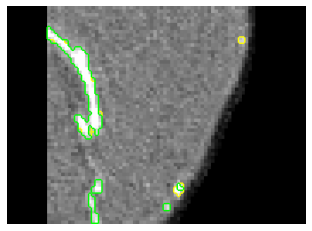

In [94]:
import numpy as np
import scipy
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

def add_countor(In, Seg, Color=(0, 255, 0)):
    """
    add segmentation contour to an input image

    In: Input PIL.Image object, should be an RGB image
    Seg: segmentation mask represented by a PIL.Image object
    Color: a vector specifying the color of contour
    Out: output PIL.Image object with segmentation contour overlayed
    """
    Out = In.copy()
    [H, W] = In.size
    for i in range(H):
        for j in range(W):
            if(i==0 or i==H-1 or j==0 or j == W-1):
                if(Seg.getpixel((i,j))!=0):
                    Out.putpixel((i,j), Color)
            elif(Seg.getpixel((i,j))!=0 and  \
                 not(Seg.getpixel((i-1,j))!=0 and \
                     Seg.getpixel((i+1,j))!=0 and \
                     Seg.getpixel((i,j-1))!=0 and \
                     Seg.getpixel((i,j+1))!=0)):
                     Out.putpixel((i,j), Color)
    return Out


def add_segmentation(image, seg_name, Color=(0, 255, 0)):
    seg = Image.open(seg_name).convert('L')
    if(image.size[1] != seg.size[1] or image.size[0] != seg.size[0]):
        print('segmentation has been resized')
        seg = seg.resize(image.size)
    seg = np.asarray(seg)
    strt = ndimage.generate_binary_structure(2, 1)
    seg = np.asarray(ndimage.morphology.binary_opening(seg, strt), np.uint8)
    seg = np.asarray(ndimage.morphology.binary_closing(seg, strt), np.uint8)

    img_show = add_countor(image, Image.fromarray(seg), Color)
    strt = ndimage.generate_binary_structure(2, 1)
    seg = np.asarray(ndimage.morphology.binary_dilation(seg, strt), np.uint8)
    img_show = add_countor(img_show, Image.fromarray(seg), Color)
    return img_show

if __name__ == "__main__":
    img_name = r"C:\Users\hello\Desktop\SSL\mida_pseudo\snapshot0001_img.png"
    seg_name = r"C:\Users\hello\Desktop\SSL\mida_pseudo\snapshot0001_pred.png"
    gld_name =r"C:\Users\hello\Desktop\SSL\mida_pseudo\snapshot0001_msk.png"
    img = Image.open(img_name)
    img_show = add_segmentation(img, gld_name, Color = (255, 255, 0))
    img_show = add_segmentation(img_show, seg_name, Color = (0, 255, 0))
    plt.imshow(img_show)
    plt.axis('off')
    plt.show()
    save_name =r"C:\Users\hello\Desktop\SSL\mida_pseudo\contour1.png"
    img_show.save(save_name)

In [90]:
arr=np.load(r'C:\Users\hello\Desktop\SSL\mida_pseudo\rtrain_unlabeled(0, 126, 43)__42seg.npy')
vol_image = nib.Nifti1Image(arr, np.eye(4))
nib.save(vol_image, r'C:\Users\hello\Desktop\SSL\mida_pseudo\rtrain_unlabeled(0, 126, 43)__42gtseg.nii.gz' )

In [ ]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from PIL import Image
from PIL import ImageFilter

def gray_to_rgb(image):
    """
    convert a gray-scale image to RGB image

    image: an input 2D numpy array with shape [H, W]
    image_cat: a output numpy array with shape [H, W, 3]
    """
    image_cat = np.asarray([image, image, image])
    image_cat = np.transpose(image_cat, [1, 2, 0])
    return image_cat


def get_slice_from_volume(image, view, slice_id):
    """
    extract a slice form a volume image

    image: a 3D numpy array with shape of [D, H, W]
    view : 0 -- axial, 1 -- sagittal, 2 -- coronal
    slice_id: slice index in the given view
    """
    if(view == 1):
        image = np.transpose(image, [2, 0, 1])
    elif(view == 2):
        image = np.transpose(image, [1, 0, 2])
    return image[slice_id]


def add_contour(In, Seg, Color=(0, 255, 0)):
    """
    add segmentation contour to an input image

    In: Input PIL.Image object, should be an RGB image
    Seg: segmentation mask represented by a PIL.Image object
    Color: a vector specifying the color of contour
    Out: output PIL.Image object with segmentation contour overlayed
    """
    Out = In.copy()
    [H, W] = In.size
    for i in range(H):
        for j in range(W):
            if(i==0 or i==H-1 or j==0 or j == W-1):
                if(Seg.getpixel((i,j))!=0):
                    Out.putpixel((i,j), Color)
            elif(Seg.getpixel((i,j))!=0 and  \
                 not(Seg.getpixel((i-1,j))!=0 and \
                     Seg.getpixel((i+1,j))!=0 and \
                     Seg.getpixel((i,j-1))!=0 and \
                     Seg.getpixel((i,j+1))!=0)):
                     Out.putpixel((i,j), Color)
                     Out.putpixel((i+1,j), Color)
                     Out.putpixel((i,j+1), Color)
                     Out.putpixel((i-1,j), Color)
                     Out.putpixel((i,j-1), Color)
    return Out

def add_segmentation_color(In, Seg, Color=(255, 0, 0), alpha=0.3):
    """
    add segmentation mask to an input image

    In: Input PIL.Image object, should be an RGB image
    Seg: segmentation mask represented by a PIL.Image object
    Color: a vector specifying the color of contour
    alpha: alpha value of the mask
    Out: output PIL.Image object with segmentation contour overlayed
    """
    Out = In.copy()
    [H, W] = In.size
    for i in range(H):
        for j in range(W):
            fg = Seg.getpixel((i,j))
            if(fg>0):
                color0 = In.getpixel((i,j))
                color1 = (int(color0[0] * (1.0 - alpha) + Color[0] * alpha),
                          int(color0[1] * (1.0 - alpha) + Color[1] * alpha),
                          int(color0[2] * (1.0 - alpha) + Color[2] * alpha))
                Out.putpixel((i,j), color1)
    return Out

def get_central_slice_index_of_nonzero_region(image, view):
    """
    get the central slice index of nonzero region of a volume 3D

    image: a 3D numpy array
    view : 0 -- axial, 1 -- sagittal, 2 -- coronal
    """
    [d_index, h_index, w_index] = np.where(image)
    if(view == 0):
        index_list = d_index
    elif(view == 1):
        index_list = w_index
    else:
        index_list = h_index
    idx_min = min(index_list)
    idx_max = max(index_list)
    i_cen = int((idx_min + idx_max)/2)
    return i_cen

def map_scalar_to_color(x):
    x_list = [0.0, 0.25, 0.5, 0.75, 1.0]
    c_list = [[0, 0, 255],
              [0, 255, 255],
              [0, 255, 0],
              [255, 255, 0],
              [255, 0, 0]]
    for i in range(len(x_list)):
        if(x <= x_list[i + 1]):
            x0 = x_list[i]
            x1 = x_list[i + 1]
            c0 = c_list[i]
            c1 = c_list[i + 1]
            alpha = (x - x0)/(x1 - x0)
            c = [c0[j]*(1 - alpha) + c1[j] * alpha for j in range(3)]
            c = [int(item) for item in c]
            return tuple(c)

def show_one_slice(img_folder, lab_folder, method_list, seg_folder_list, img_id, view_id,
         slice_id, save_dir = None, contour = False):
    img_name = "{0:}/{1:}.nii.gz".format(img_folder, img_id)
    lab_name = "{0:}/{1:}.nii.gz".format(lab_folder, img_id)
    img_obj = sitk.ReadImage(img_name)
    spacing = img_obj.GetSpacing()
    scale   = spacing[2]/spacing[0]
    img = sitk.GetArrayFromImage(img_obj)

    # Rescale the image intensity to [0,255].
    # You may need to edit this according to your data
    img = (img + 1400) / 1500 * 255
    img[img < 0]   = 0
    img[img > 255] = 255
    img = np.asarray(img, np.uint8)

    # Extract the specified slice from the image and ground truth mask
    lab_obj = sitk.ReadImage(lab_name)
    lab     = sitk.GetArrayFromImage(lab_obj)
    img_slc = get_slice_from_volume(img, view_id, slice_id)
    lab_slc = get_slice_from_volume(lab, view_id, slice_id)

    im_show_raw = gray_to_rgb(img_slc)
    im_show_raw = Image.fromarray(im_show_raw)
    lab_slc = Image.fromarray(lab_slc)

    # As the 3D resolution may be anisotropic, resampleing to isotropic
    # resolution is needed for better visualization
    if(view_id == 1 or view_id == 2):
        new_size = [im_show_raw.size[0], int(im_show_raw.size[1] * scale)]
        im_show_raw = im_show_raw.resize(new_size)
        lab_slc = lab_slc.resize(new_size)

    seg_list = []
    for seg_folder in seg_folder_list:
        seg_name = "{0:}/{1:}.nii.gz".format(seg_folder, img_id)
        seg_obj = sitk.ReadImage(seg_name)
        seg     = sitk.GetArrayFromImage(seg_obj)
        seg_slc = get_slice_from_volume(seg, view_id, slice_id)
        seg_slc = Image.fromarray(seg_slc)
        if(view_id == 1 or view_id == 2):
            seg_slc = seg_slc.resize(new_size)
        seg_list.append(seg_slc)

    plt.figure(figsize=(15, 8))
    im_show = im_show_raw
    if(contour):
        im_show = add_contour(im_show, lab_slc, (255, 128, 0))
        im_gt   = im_show
    else:
        im_gt   = add_segmentation_color(im_show, lab_slc)
    N  = len(seg_list)
    column = int((N + 3) / 2)
    plt.subplot(2, column, 1); plt.axis("off")
    plt.imshow(im_show_raw); plt.title("image")
    plt.subplot(2, column, 2); plt.axis("off")
    plt.imshow(im_gt); plt.title("ground_truth")

    if(save_dir):
        save_name = "{0:}/{1:}_{2:}_img.png".format(save_dir, img_id, slice_id)
        im_show_raw.save(save_name)
        save_name = "{0:}/{1:}_{2:}_gt.png".format(save_dir, img_id, slice_id)
        im_gt.save(save_name)
    for n in range(N):
        plt.subplot(2, column, n + 3); plt.axis("off")
        if(contour):
            im_show_n = add_contour(im_show, seg_list[n])
        else:
            im_show_n = add_segmentation_color(im_show, seg_list[n])
        if(save_dir):
            save_name = "{0:}/{1:}_{2:}_{3:}_.png".format(save_dir,
                img_id, slice_id, method_list[n])
            im_show_n.save(save_name)
        plt.imshow(im_show_n); plt.title(method_list[n])

    plt.show()


def show_results_for_comparison():
    """
    show 3d segmentation results in axial, sagittal or coronal views
    """
    img_folder = "./image"
    lab_folder = "./label"
    seg_root = "./net_compare"
    methods  = ["unet", "unet_att" "unet3d", "vnet"]
    seg_folder_list  = ["unet2d/result", "unet_att/result", "unet3d/result", "vnet/result"]
    seg_folder_list = [seg_root + '/' + item for item in seg_folder_list]

    save_dir= False #  "./image1" #
    img_id  = "image1"
    view_id  = 0  # 0-axial, 1-sagittal, 2-coronal
    slice_id = 50

    show_one_slice(img_folder, lab_folder, methods, seg_folder_list,
          img_id, view_id, slice_id, save_dir, contour=False)


if __name__ == "__main__":
    show_results_for_comparison()

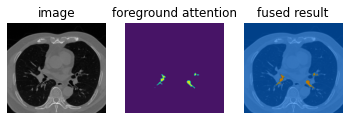

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def map_scalar_to_color(x):
    x_list = [0.0, 0.25, 0.5, 0.75, 1.0]
    c_list = [[0, 0, 255],
              [0, 255, 255],
              [0, 255, 0],
              [255, 255, 0],
              [255, 0, 0]]
    for i in range(len(x_list)):
        if(x <= x_list[i + 1]):
            x0 = x_list[i]
            x1 = x_list[i + 1]
            c0 = c_list[i]
            c1 = c_list[i + 1]
            alpha = (x - x0)/(x1 - x0)
            c = [c0[j]*(1 - alpha) + c1[j] * alpha for j in range(3)]
            c = [int(item) for item in c]
            return tuple(c)

def get_fused_heat_map(image, att):
    [H, W] = image.size
    img = Image.new('RGB', image.size, (255, 0, 0))

    for i in range(H):
        for j in range(W):
            p0 = image.getpixel((i,j))
            alpha = att.getpixel((i,j))
            p1 = map_scalar_to_color(alpha)
            alpha = 0.5 + alpha*0.3
            p  = [int(p0[c] * (1 - alpha) + p1[c]*alpha) for c in range(3)]
            p = tuple(p)
            img.putpixel((i,j), p)
    return img

if __name__ == "__main__":
    image_name  = r"E:\recente_net\airway\airway1.png"
    scalar_name = r"E:\recente_net\airway\airway_heatmap12.png"
    save_name   = r"E:\recente_net\airway\airway_heatmapssd.png"

    # img_name = r"C:\Users\hello\Desktop\SSL\mida_pseudo\snapshot0001_img.png"
    # seg_name = r"C:\Users\hello\Desktop\SSL\mida_pseudo\snapshot0001_pred.png"
    # gld_name =r"C:\Users\hello\Desktop\SSL\mida_pseudo\snapshot0001_msk.png"
    img = Image.open(image_name)
    # load the scalar map, and normalize the inteinsty to  0 - 1
    scl = Image.open(scalar_name).convert('L')
    scl_norm = np.asarray(scl, np.float32)/255
    scl_norm = Image.fromarray(scl_norm)

    # convert the scalar map to heat map, and fuse it with the original image
    img_scl = get_fused_heat_map(img, scl_norm)
    img_scl.save(save_name)

    plt.subplot(1,3,1), plt.axis('off')
    plt.imshow(img), plt.title('image')
    plt.subplot(1,3,2), plt.axis('off')
    plt.imshow(scl), plt.title('foreground attention')
    plt.subplot(1,3,3), plt.axis('off')
    plt.imshow(img_scl), plt.title('fused result')
    plt.show()


Get image imformation :Size,Spacing

In [71]:
filepath=r'E:\Challenges2023\XunFei\Brain_PET\datasets\Pre_processing\train\\'
savepath=r'E:\Challenges2023\XunFei\Brain_PET\datasets\Pre_processing\test\\'
# savepath=r'I:\ATLAS_R2.0_new\\'
# savedata=os.path.join(savepath, 'image\\')
# savelabel=os.path.join(savepath, 'mask\\')
file_list = sorted(glob.glob(os.path.join(filepath, 'NC\\'+ '*NC.nii.gz')))#R001
# fp=open(filepath+'\\train_test_resample_info.txt', "a+")
for file in tqdm(file_list,total=len(file_list)):
    filename=file.split('NC\\')[-1].replace('NC.nii.gz','')
    savename=savepath+filename+'roi.nii.gz'
    print('filename:',filename)
    # roi_sitk(file,savename)
    # resample(file,savename)
    data=nib.load(file)
    data_arr=data.get_fdata()
    # size=data_arr.shape
    get_roi(data_arr)
    # nor_data=Normal(data_arr)#归一化
    # crop_data=Centr_crop(nor_data,size)
    # norimg=nib.Nifti1Image(data_arr, data.affine)
    # nib.save(norimg,savepath+filename+'Ts.nii.gz')
    # print('affine:',data.affine,file=fp)
    # print('size:',size,file=fp)
# fp.close()

  8%|▊         | 2/25 [00:00<00:02, 11.25it/s]

filename: 10
(128, 128, 63)
0 127 0 127 0 62
filename: 11
(128, 128, 63)
0 127 0 127 0 62
filename: 12


 16%|█▌        | 4/25 [00:00<00:01, 11.29it/s]

(128, 128, 63)
0 127 0 127 0 62
filename: 13
(128, 128, 63)
0 127 0 127 0 62
filename: 14


 24%|██▍       | 6/25 [00:00<00:01, 10.11it/s]

(128, 128, 63)
0 127 0 127 0 62
filename: 15
(128, 128, 63)
0 127 0 127 0 62
filename: 16
(124, 124, 63)
0 123 0 123 0 62
filename: 17


 32%|███▏      | 8/25 [00:00<00:01,  9.96it/s]

(166, 166, 67)
0 165 0 165 0 66
filename: 18
(166, 166, 67)
0 165 0 165 0 66
filename: 19


 40%|████      | 10/25 [00:01<00:01,  8.54it/s]

(166, 166, 68)
0 165 0 165 0 67
filename: 1
(128, 128, 63)
0 127 0 127 0 62
filename: 20


 48%|████▊     | 12/25 [00:01<00:01,  8.43it/s]

(166, 166, 67)
0 165 0 165 0 66
filename: 21
(124, 124, 74)
0 123 0 123 0 73
filename: 22


 60%|██████    | 15/25 [00:01<00:01,  7.51it/s]

(152, 152, 104)
0 151 0 151 0 103
filename: 23
(152, 152, 104)
0 151 0 151 0 103


 64%|██████▍   | 16/25 [00:01<00:01,  7.14it/s]

filename: 24
(152, 152, 104)
0 151 0 151 0 103
filename: 25


 68%|██████▊   | 17/25 [00:02<00:01,  6.04it/s]

(198, 198, 91)
0 197 0 197 0 90
filename: 2
(128, 128, 63)
0 127 0 127 0 62
filename: 3


 80%|████████  | 20/25 [00:02<00:00,  7.28it/s]

(160, 160, 65)
0 159 0 159 0 64
filename: 4
(160, 160, 65)
0 159 0 159 0 64
filename: 5


 92%|█████████▏| 23/25 [00:02<00:00,  8.47it/s]

(160, 160, 65)
0 159 0 159 0 64
filename: 6
(128, 128, 65)
0 127 0 127 0 64
filename: 7
(128, 128, 65)
0 127 0 127 0 64
filename: 8


100%|██████████| 25/25 [00:03<00:00,  8.04it/s]

(160, 160, 65)
0 159 0 159 0 64
filename: 9
(128, 128, 63)
0 127 0 127 0 62


In [2]:
def Normal(img):
    img_tensor=img
    MEAN, STD = img_tensor.mean(), img_tensor.std()
    MAX, MIN = img_tensor.max(), img_tensor.min()
    # print(MEAN,STD,MAX,MIN)
    new_data = (img_tensor - MEAN) / STD
    return new_data

In [21]:
def Centr_crop(img,size):
    # image = torch.Tensor(img)
    center=(size[1]/2,size[1]/2,size[2]/2)
    startx=int(center[0]-64)
    endx=int(center[0]+64)

    starty=int(center[1]-64)
    endy=int(center[1]+64)
    # print(startx,endx,starty,endx,img.shape,size[2],img)
    crop_arr=img[startx:endx,starty:endy,0:size[2],:]
    return crop_arr

# Get end coordinate
# end_coord = data_dict["end_coord"]


In [37]:
def resample(img,savename):
    new_spacing=[2.0594,2.0594,2.425]
    input_image = sitk.ReadImage(img)
    # print(input_image.GetSize(),input_image.GetSpacing())
    new_size = np.array(input_image.GetSize()) * np.array(input_image.GetSpacing()) / np.array(new_spacing)
    new_size = np.round(new_size).astype(int)  # 取整数值
    resampled_img = sitk.Resample(input_image, new_size.tolist(),
                              sitk.Transform(), sitk.sitkLinear, input_image.GetOrigin(),
                              new_spacing, input_image.GetDirection(), 0, input_image.GetPixelID())
    sitk.WriteImage(resampled_img, savename)

In [68]:
def roi_sitk(img,name):
    threshold=0
    radius = 3
    # ball = sitk.sitkBall(radius)
    image = sitk.ReadImage(img)
    mask = sitk.BinaryThreshold(image, lowerThreshold=threshold, upperThreshold=255)
    closed_mask = sitk.BinaryMorphologicalClosing(mask, sitk.sitkBall, 5)
    roi_image = sitk.Mask(image, closed_mask)
    sitk.WriteImage(roi_image, name)

generate mask(get feature)

In [1]:


import numpy as np
from scipy.ndimage import label, binary_fill_holes, binary_erosion
from skimage.filters import threshold_otsu
filepath=r'E:\Challenges2023\XunFei\Brain_PET\datasets\Pre_processing\train_threshold\\'
savepath=r'E:\Challenges2023\XunFei\Brain_PET\datasets\Pre_processing\train_threshold\\'
# savepath=r'I:\ATLAS_R2.0_new\\'
# savedata=os.path.join(savepath, 'image\\')
# savelabel=os.path.join(savepath, 'mask\\')
file_list = sorted(glob.glob(os.path.join(filepath, '*.nii.gz')))#R001
# fp=open(filepath+'\\train_test_resample_info.txt', "a+")
for file in tqdm(file_list,total=len(file_list)):
    filename=file.split('train_threshold\\')[-1]
    savename=savepath+filename
    print('filename:',filename)
    img_nii = sitk.ReadImage(file, outputPixelType=sitk.sitkUInt16)
    img_fill = sitk.BinaryFillhole(img_nii)
    # img_savedir = savepath+filename

    sitk.WriteImage(img_fill, savename)

    # norimg=nib.Nifti1Image(binary, np.eye(4))
    # nib.save(norimg,savepath+filename+'Ts.nii.gz')
    # # np.save('filled_image.npy', binary)

NameError: name 'glob' is not defined

In [8]:
with open(r'E:\SSL_zengxq\connnet_num_info.txt', 'r') as f:
    image_list = f.readlines()

In [9]:
image_list  class0,class1,class2,class3,class4: 374 765 29 119 213


['filename, sum_num, max, save, dele\n',
 'rtrain_unlabeled(0, 126, 43)__42seg.nii.gz , 24 , 2683 , 7 , 16\n',
 'rtrain_unlabeled(0, 138, 21)__41seg.nii.gz , 23 , 50 , 23 , -1\n',
 'rtrain_unlabeled(0, 169, 3)__68seg.nii.gz , 16 , 59 , 16 , -1\n',
 'rtrain_unlabeled(0, 57, 19)__81seg.nii.gz , 17 , 14 , 17 , -1\n',
 'rtrain_unlabeled(0, 57, 24)__75seg.nii.gz , 22 , 35 , 22 , -1\n',
 'rtrain_unlabeled(0, 82, 7)__36seg.nii.gz , 15 , 2074 , 6 , 8\n',
 'rtrain_unlabeled(1, 186, 48)__83seg.nii.gz , 25 , 3 , 25 , -1\n',
 'rtrain_unlabeled(1, 76, 1)__56seg.nii.gz , 9 , 1829 , 4 , 4\n',
 'rtrain_unlabeled(1, 78, 50)__14seg.nii.gz , 27 , 10 , 27 , -1\n',
 'rtrain_unlabeled(10, 148, 38)__97seg.nii.gz , 29 , 3471 , 4 , 24\n',
 'rtrain_unlabeled(10, 157, 30)__79seg.nii.gz , 25 , 2899 , 4 , 20\n',
 'rtrain_unlabeled(10, 174, 56)__14seg.nii.gz , 29 , 75 , 29 , -1\n',
 'rtrain_unlabeled(10, 50, 1)__45seg.nii.gz , 5 , 49 , 5 , -1\n',
 'rtrain_unlabeled(10, 72, 8)__37seg.nii.gz , 18 , 2235 , 7 , 10\n',


In [19]:
arr=np.load(r'E:\SSL_zengxq\train_label_(64, 64, 0)__0gt.npy')
arr=np.array(arr,dtype='float32')
# 创建NIfTI文件
nifti_label = nib.Nifti1Image(arr, np.eye(4))
nib.save(nifti_label, r'E:\SSL_zengxq\train_label_(64, 64, 0)__0gt.nii.gz')

In [24]:
from PIL import Image
data=nib.load(r'E:\recente_net\airway\ok_Airway1.nii.gz')
data_arr=data.get_fdata()
img=data_arr[:,:,149]
img=img.swapaxes(0, 1)
# norimg=nib.Nifti1Image(img, np.eye(4))
# nib.save(norimg,r'E:\recente_net\airway\vessel1.nii.gz')
plt.imsave(r'E:\recente_net\airway\airway1.png', img, cmap='gray')
# imga = Image.fromarray(img)
#
# # 保存为 PNG 文件
# imga.save(r'E:\recente_net\airway\vessel.png')

In [6]:
nums=[3,2,2,3]
val=3
s=0
for f in range (len(nums)):
    if nums[f]!=val:
        nums[s]=nums[f]
        # nums[i]=nums[i+1]
        # print('n is :',n)
# return len(nums)-n
        print(s,nums)
        s=s+1


0 [2, 2, 2, 3]
1 [2, 2, 2, 3]


In [12]:
list=[4, 3, 4, 5, 2, 3, 4, 5, 6]
min(list)

2

In [11]:
for i in range(5,-1,-1):
    print(i)

5
4
3
2
1
0


In [1]:
5/2

2.5

In [9]:
class Node:
	def __init__(self, data, next=None):
		self.data = data
		self.next = next


In [12]:
node1=Node(1)
node2=Node(4)
node3=Node(9)
node4=Node(16)
node5=Node(25)
# node5.data.
node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5
print(node5.data)


25


(704, 704)


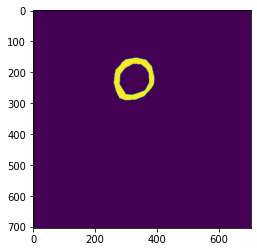

In [12]:
label_arr=np.load(r'E:\Challenges2023\XunFei\oct\基于医学影像的冠状动脉血管及斑块三维重建挑战赛公开数据\train\labels\IMG001-img-00001-00033.npy')
print(label_arr.shape)
import matplotlib.pyplot as plt
plt.imshow(label_arr)
plt.show()
# label_arr=np.array(label_arr,dtype=)
# plt.show()
# label_arr=np.argmax(label_arr,axis=3)

链表


In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [15]:
a=[9,6,3,8,5,2,7,4,1,0]
for i in range(len(a)):
    # ListNodeAA=ListNode.next(i)
    ListNode.next=i
    ListNode.val=a[i]
    # print(i,a[i],ListNode.val)
    print(ListNode.next)
# print(ListNode.size)


0
1
2
3
4
5
6
7
8
9


In [26]:
import numpy as np

# 创建两个示例数组
arr1 = np.array([[1, 2, 3],[3,2,1]])
arr2 = np.array([[4, 5, 6],[6,5,4]])
arr3 = np.array([[4, 5, 6],[6,5,4]])

# 在0维度拼接数组
arr11=np.expand_dims(arr1,axis=0)
arr22=np.expand_dims(arr2,axis=0)
arr33=np.expand_dims(arr3,axis=0)

result = np.concatenate((arr11, arr22,arr33), axis=0)
# arr11=np.expand_dims(arr1,axis=0)
print(arr11.shape,arr2.shape,result.shape)

(1, 2, 3) (2, 3) (3, 2, 3)


In [29]:
import sys

for line in sys.stdin:
    a, b = line.split(' ')
    print(int(a) + int(b))

In [31]:

a='a'
b='b'
print(a+b)
# print(int(a)+int(b))

ab
